# A/B Testing Advertising Campaign for Increased Customer Purchases


## 1.Project Overview:

A company aims to run a successful advertising campaign that effectively increases customer purchases through product advertisements.  To ensure the campaign's effectiveness in boosting sales, the company will conduct an A/B test.

### 1.1 Questions:
Would the campaign be successful?

### 1.2 Methodology:

The company will divide potential customers into two groups:

Experimental Group: The majority of customers will be exposed to the product advertisements.

Control Group: A smaller portion of customers will see a Public Service Announcement (PSA) or nothing at all in the same space typically occupied by the ad.

### 1.3 Statistical Analysis:

Since we have two separate groups (experimental and control), a two-sample hypothesis test (A/B testing) will be used to analyze the results and determine the effectiveness of the advertising campaign in driving sales.


### 1.4 About Data:
Data dictionary:
- Index: Row index
- user id: User ID (unique)
- test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
- converted: If a person bought the product, then True, else is False
- total ads: Amount of ads seen by person
- most ads day: Day that the person saw the biggest amount of ads
- most ads hour: Hour of day that the person saw the biggest amount of ads

## 2.  Preprocessing

Here, I imported all the required libraries and extensions for data analysis: 

- NumPy for numerical computations, 
- Pandas for data manipulation and preprocessing, 
- Matplotlib for visualization,  
- SciPy for statistical modeling.

After importing the dataset, I explore it to gain a better understanding.

### 2.1 Import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline


### 2.2 Import Dataset

In [2]:
df_camp=pd.read_csv("/kaggle/input/marketing-ab-testing/marketing_AB.csv")
df_camp.head(10)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
5,5,1137664,ad,False,734,Saturday,10
6,6,1116205,ad,False,264,Wednesday,13
7,7,1496843,ad,False,17,Sunday,18
8,8,1448851,ad,False,21,Tuesday,19
9,9,1446284,ad,False,142,Monday,14


### 2.3 Data Exploration

I remove the first column from the DataFrame as it doesn't contain the data I need. Then, I check the DataFrame's information to understand data types, column names, and dataset size with info() function of python. 

I used describe() function to show a variety of key stats all at once. we can use the min() and max() functions together to compute the range of our data and mean() and median() to detect outliers.

In [3]:
df_selected=df_camp.drop('Unnamed: 0', axis=1)
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [4]:
df_selected.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user id,588101.0,NaN,NaN,NaN,1310692.215793,202225.983128,900000.0,1143190.0,1313725.0,1484088.0,1654483.0
test group,588101,2,ad,564577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
converted,588101,2,False,573258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total ads,588101.0,NaN,NaN,NaN,24.820876,43.715181,1.0,4.0,13.0,27.0,2065.0
most ads day,588101,7,Friday,92608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most ads hour,588101.0,NaN,NaN,NaN,14.469061,4.834634,0.0,11.0,14.0,18.0,23.0


This table shows the dataset. It has two test groups, with the "ad" type being the most frequent. Additionally, there are two converted groups, with "False" being the most frequent value.

In [5]:
df_selected.shape

(588101, 6)

Dataset has 588101 rows and 6 columns

In [6]:
df_selected.nunique()

user id          588101
test group            2
converted             2
total ads           807
most ads day          7
most ads hour        24
dtype: int64

It has each row for each customers, because number of unique of user_id is equal with number of row.


In [7]:
df_selected.isnull().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

It dose not have null value.

In [8]:
# check duplicate value.
df_selected.duplicated().sum()

0

In [9]:
df_selected[df_selected["user id"].duplicated()].count()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

It dose not have duplicat value.

In [10]:
# show two group names.
df_selected['test group'].unique()

array(['ad', 'psa'], dtype=object)

In [11]:
# show two converted value.
df_selected['converted'].unique()

array([False,  True])

`True` = bought 

`False` = didn't buy

In [12]:
# Days of running campaign
sorted(df_selected['most ads day'].unique())

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [13]:
# Days of running campaign
np.array(sorted(df_selected['most ads hour'].unique()))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

The campaign targeted all days of the week and did not restrict impressions by time of day. Ads were shown 24/7.

In [14]:
df_selected['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

In [15]:
df_selected['test group'].value_counts(normalize=True)

test group
ad     0.96
psa    0.04
Name: proportion, dtype: float64

A large group of participants was selected for the experimental group, while a smaller group served as the control group,  4% of participants were assigned to the control group (seeing a PSA), and the remaining 96% were in the experimental group (exposed to the ad). 

In [16]:
df_selected['converted'].value_counts()

converted
False    573258
True      14843
Name: count, dtype: int64

In [17]:
df_selected['converted'].value_counts(normalize=True)

converted
False    0.974761
True     0.025239
Name: proportion, dtype: float64

Interestingly, the data shows that only 3% of the population has already purchased from the company, with  97% not making a purchase. However, it's important to note that this doesn't necessarily reflect the effectiveness of the advertising campaign yet.


In [18]:
df_selected.groupby('test group')['converted'].value_counts()

test group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
Name: count, dtype: int64

In [19]:
df_selected.groupby('test group')['converted'].value_counts(normalize=True)

test group  converted
ad          False        0.974453
            True         0.025547
psa         False        0.982146
            True         0.017854
Name: proportion, dtype: float64

By grouping the data by "test group" and analyzing purchase rates, I observed a difference between the two groups, suggesting a potential effect from the campaign. This difference in purchase rates is nearest 1%, which may seem small, but in a large dataset, even small differences can be statistically significant. To confirm this and quantify the effect size, I'll proceed with a hypothesis test.

## 3. Conduct a hypothesis A/B testing (T-test )
I want to answer this question: "Will the advertising campaign be successful?"

To assess this, I'll compare conversion rates (bought/not bought) between the two test groups (ad and psa). Since we have two independent groups, we can use a two-sample hypothesis test.

### 3.1 Explore the data
To start, I filtered all data frame into two dataframe 'ad' and 'psa' group. And I computed mean of two groups.

In [20]:
group_ad=df_selected[df_selected['test group']=='ad']
group_psa=df_selected[df_selected['test group']=='psa']

I calculated mean of `converted` of population for each group.

In [21]:
group_ad['converted'].mean()

0.025546559636683747

In [22]:
group_psa['converted'].mean()

0.01785410644448223

### 3.2 Apply the central limit theorem for random sampling
I repeated the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. Next,I created a new DataFrame from the list of 10,000 estimates. Name the new variable. I computed the mean() of the sampling distribution of 10,000 random samples.

In [23]:
estimate_list_ad = []
for i in range(10000):
    estimate_list_ad.append(group_ad['converted'].sample(n=5000,replace=True).mean())

In [24]:
estimate_df_ad = pd.DataFrame(data={'estimate': estimate_list_ad})
estimate_df_ad

,estimate
0,0.0242
1,0.0236
2,0.0218
3,0.0220
4,0.0244
...,...
9995,0.0326
9996,0.0254
9997,0.0224
9998,0.0234


In [25]:
estimate_list_psa = []
for i in range(10000):
    estimate_list_psa.append(group_psa['converted'].sample(n=5000,replace=True).mean())

In [26]:
estimate_df_psa = pd.DataFrame(data={'estimate': estimate_list_psa})
estimate_df_psa

,estimate
0,0.0168
1,0.0198
2,0.0156
3,0.0196
4,0.0178
...,...
9995,0.0180
9996,0.0150
9997,0.0178
9998,0.0196


In [27]:
estimate_df_ad.mean()

estimate    0.025566
dtype: float64

In [28]:
estimate_df_psa.mean()

estimate    0.017862
dtype: float64

The central limit theorem assures us that, even if the original data isn't normally distributed, the means of sufficiently large samples will be approximately normally distributed around the population mean. 
According to the central limit theorem, the mean of the preceding sampling distribution should be roughly equal to the population mean.

This is evident here, as the sample means for the 'ad' group (0.025547) and the 'psa' group (0.017874) are very close to the population means (ad='0.025546559636683747' and psd = '0.01785410644448223'). 

Because of this, I can confidently use these samples in our t-test.

### 3.3 Output the sampling distribution using a histogram
I visualized estimate sampling distribution for two groups.

<Axes: >

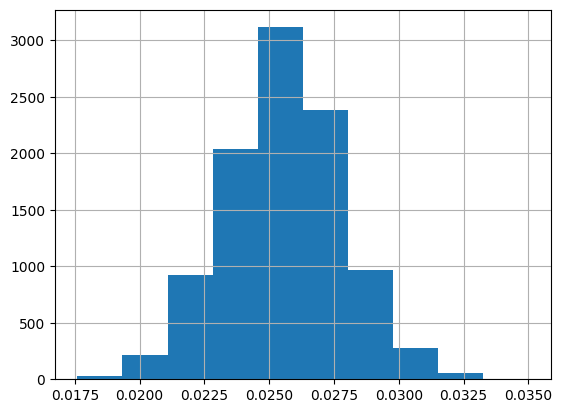

In [29]:
# ad group
estimate_df_ad['estimate'].hist()

<Axes: >

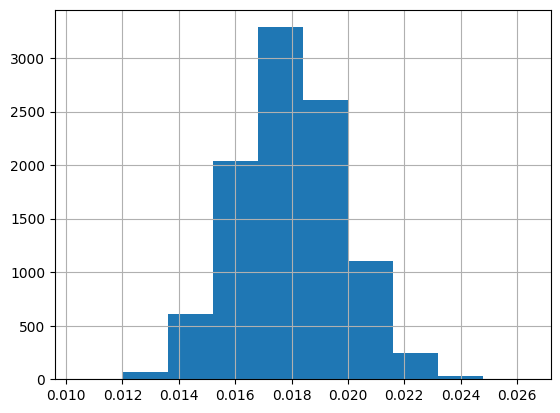

In [30]:
# psa group
estimate_df_psa['estimate'].hist()

### 3.4 Conduct a hypothesis test

Now that I have organized my data and simulated random sampling, I am ready to conduct my hypothesis test. I use two-sample t-test that it is the standard approach for comparing the means of two independent samples. 
To review, the steps for conducting a hypothesis test are:
1. State the null hypothesis and the alternative hypothesis. 
2. Choose a significance level.
3. Find the p-value.
4. Reject or fail to reject the null hypothesis.

#### Step1:
In a two-sample t-test, the null hypothesis states that there is no difference between the purchases of your two groups. The alternative hypothesis states the contrary claim: there is a difference between the means of your two groups.

#### Here are the hypotheses:

Null Hypothesis (H₀): Advertising is not effective in increasing product purchases.

Alternative Hypothesis (Hₐ): Advertising is effective in increasing product purchases.

#### Step2:
Choose a significance level The significance level is the threshold at which you will consider a result statistically significant. This is the probability of rejecting the null hypothesis when it is true. I used standard level of 5%, or 0.05.

#### Step3:
Find the p-value, I used Python function to compute p-value.

In [31]:
t_statistic, p_value = stats.ttest_ind(estimate_df_ad,estimate_df_psa,equal_var=False)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: [262.92312284]
P-value: [0.]


## 4. Conclusion
#### Step 4: 
Reject or fail to reject the null hypothesis to draw a conclusion, I compared my p-value with the significance level. (p-value=0.0 < significant level=0.05)

The p-value is less than the significance level, I can conclude that there is a statistically significant difference in the mean two gorup of campaign and the campaign is effective on customer purchases. In other words, I will reject the null hypothesis H0.